In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
import warnings

from IPython.display import display
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [2]:
df = pd.read_csv('./files test/Noticias.csv')
df.sample(25)

,TITLE,SUMMARY,text,polaridade,topics,termos
9903,"R$ 6.101,05 é o novo valor do teto no INSS","<p>Esta notícia <a href=""https://www.mixvale.c...",esta notícia href rel nofollow novo valor teto...,Negativo,topic_7,"['REL', 'HREF REL', 'REL NOFOLLOW', 'NOFOLLOW'..."
9950,Rio: processo contra ex-secretário de educação...,Desembargador Custódio de Barros Torres relata...,desembargador custódio barros torres relata qu...,Neutro,topic_15,"['ANOS', 'CASA', 'APÓS', 'REDES', 'SOCIAIS', '..."
6766,Prazo de validade para sacar o Bolsa Família é...,"<p>Esta notícia <a href=""https://www.mixvale.c...",esta notícia href rel nofollow prazo validade ...,Negativo,topic_7,"['REL', 'HREF REL', 'REL NOFOLLOW', 'NOFOLLOW'..."
6758,Recolha suas contribuições em atraso no INSS,"<p>Esta notícia <a href=""https://www.mixvale.c...",esta notícia href rel nofollow recolha suas co...,Positivo,topic_7,"['REL', 'HREF REL', 'REL NOFOLLOW', 'NOFOLLOW'..."
2923,Polícia prende suspeito de matar e queimar cor...,"<img src=""https://s2.glbimg.com/Yg7mmdb2idNN8N...",operação baixada fluminense também prendeu exp...,Positivo,topic_4,"['POLÍCIA', 'HOMEM', 'CIVIL', 'CRIME', 'VÍTIMA..."
13830,Sociedade de Engenharia do RS debate Reforma A...,Governador Eduardo Leite participou da discuss...,governador eduardo leite participou discussão ...,Neutro,topic_5,"['NESTA', 'RIO', 'DIA', 'QUINTAFEIRA', 'SEMANA..."
2460,VÍDEOS: Bom Dia Cidade região de Piracicaba de...,"<img src=""https://s2.glbimg.com/ousaueEUzmXzRr...",veja reportagens das regiões campinas piracica...,Positivo,topic_12,"['REGIÃO', 'DESTA', 'CARRO', 'LOCAL', 'ACIDENT..."
12889,Prefeitura cria sala de leitura para homenagea...,"Localizado no Complexo do Salgueiro, o espaço ...",localizado complexo salgueiro espaço vai conta...,Positivo,topic_1,"['HREF', 'TARGET _BLANK', '_BLANK', 'TARGET', ..."
15349,Ministério Público diz ter indícios de que mor...,O Ministério Público do Amazonas apontou forte...,ministério público amazonas apontou fortes hre...,Positivo,topic_1,"['HREF', 'TARGET _BLANK', '_BLANK', 'TARGET', ..."
5544,Abono do Pis-Pasep: Como funciona a concessão?,"<p>Esta notícia <a href=""https://www.mixvale.c...",esta notícia href rel nofollow abono pispasep ...,Negativo,topic_7,"['REL', 'HREF REL', 'REL NOFOLLOW', 'NOFOLLOW'..."


In [4]:
df['polaridade'].value_counts()

Positivo    11368
Negativo     3337
Neutro        907
Name: polaridade, dtype: int64

In [5]:
df['topics'].value_counts()

topic_7     3482
topic_1     3380
topic_4     1245
topic_2     1059
topic_13     929
topic_14     912
topic_5      857
topic_3      816
topic_12     650
topic_9      616
topic_15     459
topic_10     395
topic_11     361
topic_6      236
topic_8      215
Name: topics, dtype: int64

## Word Cloud

In [11]:
stopwords = set(STOPWORDS)

words = ' '.join(df['text'])
word_clean = " ".join([word for word in words.split()
                      if 'https' not in word
                      and 'href' not in word
                      and 'rel' not in word
                      and 'nofollow' not in word
                      and 'mixvale' not in word])

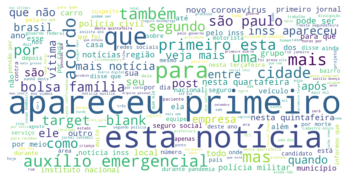

In [12]:
warnings.simplefilter('ignore')
#twitter_mask = imread('brasil_mask.png')

wc = WordCloud(min_font_size=10,
              max_font_size=300,
              background_color='white',
              mode="RGB",
              stopwords=stopwords,
              width=2000,
              height=1000,
              #mask=twitter_mask,
              normalize_plurals = True).generate(word_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()